In [74]:
import pandas as pd

In [75]:
cls = pd.read_csv("/home/sysadm/Documents/merge_data_all_year_date_datefresh.csv")

In [76]:
cls

,latitude,longitude,2018-01-02,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-09,2018-01-13,2018-01-14,...,2023-08-07,2023-08-11,2023-08-12,2023-08-16,2023-08-17,2023-09-09,2023-09-10,2023-09-12,2023-09-14,2023-09-22
0,28.414,77.171,0.322,0.816000,1.422000,2.179,1.117,0.625,0.206,0.441,...,1.186,1.498,1.498,1.898,1.438,0.905,0.635,0.666,0.889,0.465
1,28.414,77.181,0.305,0.818462,1.360000,2.154,1.069,0.615,0.201,0.430,...,1.126,1.411,1.400,1.830,1.337,0.886,0.625,0.611,0.855,0.391
2,28.414,77.192,0.293,0.824012,1.337000,2.130,1.059,0.603,0.205,0.437,...,1.124,1.310,1.366,1.752,1.338,0.854,0.633,0.589,0.819,0.394
3,28.414,77.202,0.305,0.833312,1.314000,2.129,1.047,0.624,0.222,0.453,...,1.146,1.298,1.375,1.763,1.369,0.857,0.640,0.601,0.823,0.417
4,28.414,77.213,0.319,0.848415,1.327000,2.147,1.050,0.653,0.241,0.453,...,1.187,1.334,1.450,1.801,1.340,0.891,0.667,0.662,0.858,0.472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,28.864,77.078,0.235,0.381000,1.622980,1.339,1.107,0.696,0.286,0.276,...,1.468,1.528,1.353,2.004,1.537,0.909,0.658,0.909,1.041,0.527
1346,28.864,77.088,0.246,0.373000,1.633852,1.259,1.066,0.698,0.286,0.293,...,1.566,1.533,1.410,2.410,1.592,0.926,0.699,1.010,1.076,0.607
1347,28.864,77.098,0.248,0.375000,1.647527,1.258,1.055,0.692,0.302,0.295,...,1.563,1.536,1.438,2.407,1.596,0.922,0.699,0.995,1.077,0.625
1348,28.864,77.109,0.246,0.375000,1.668693,1.244,1.055,0.698,0.320,0.314,...,1.575,1.536,1.462,2.404,1.646,0.915,0.735,1.008,1.038,0.678


In [77]:
cls.columns

Index(['latitude', 'longitude', '2018-01-02', '2018-01-04', '2018-01-05',
       '2018-01-06', '2018-01-07', '2018-01-09', '2018-01-13', '2018-01-14',
       ...
       '2023-08-07', '2023-08-11', '2023-08-12', '2023-08-16', '2023-08-17',
       '2023-09-09', '2023-09-10', '2023-09-12', '2023-09-14', '2023-09-22'],
      dtype='object', length=701)

cls[0:]

In [79]:
mean_values = cls.iloc[:, 2:].mean(axis=1)
mean_values

0       0.792342
1       0.778448
2       0.778435
3       0.788257
4       0.810625
          ...   
1345    0.827083
1346    0.843681
1347    0.844626
1348    0.839297
1349    0.815679
Length: 1350, dtype: float64

# mean AOD values over all year based upon point

In [122]:

# Create a DataFrame with the calculated mean values
mean_aod_df = pd.DataFrame({'latitude': cls["latitude"],'longitude' :cls["longitude"], 'Mean_AOD': mean_values.values})

# Display the result
print(mean_aod_df)


      latitude  longitude  Mean_AOD
0       28.414     77.171  0.792342
1       28.414     77.181  0.778448
2       28.414     77.192  0.778435
3       28.414     77.202  0.788257
4       28.414     77.213  0.810625
...        ...        ...       ...
1345    28.864     77.078  0.827083
1346    28.864     77.088  0.843681
1347    28.864     77.098  0.844626
1348    28.864     77.109  0.839297
1349    28.874     77.088  0.815679

[1350 rows x 3 columns]


In [125]:
df = mean_aod_df

In [127]:
df[['Mean_AOD']]

,Mean_AOD
0,0.792342
1,0.778448
2,0.778435
3,0.788257
4,0.810625
...,...
1345,0.827083
1346,0.843681
1347,0.844626
1348,0.839297


In [129]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Assuming you have a DataFrame 'df' with 'Mean_AOD' values

# Select the 'Mean_AOD' column
aod_values = df[['Mean_AOD']]

# Specify the number of clusters you want to create
num_clusters = 5  # You can adjust this based on your data and requirements

# Perform K-Means clustering on AOD values
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(aod_values)

# Add the cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Calculate the mean AOD values for each cluster
mean_aod_df = df.groupby('Cluster')['Mean_AOD'].mean().reset_index()

# 'mean_aod_df' now contains the mean AOD values for each cluster of AOD values


/home/sysadm/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f0d572ca8e0>
Traceback (most recent call last):
  File "/home/sysadm/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/sysadm/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/sysadm/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
        

In [82]:
cls

,latitude,longitude,2018-01-02,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-09,2018-01-13,2018-01-14,...,2023-08-07,2023-08-11,2023-08-12,2023-08-16,2023-08-17,2023-09-09,2023-09-10,2023-09-12,2023-09-14,2023-09-22
0,28.414,77.171,0.322,0.816000,1.422000,2.179,1.117,0.625,0.206,0.441,...,1.186,1.498,1.498,1.898,1.438,0.905,0.635,0.666,0.889,0.465
1,28.414,77.181,0.305,0.818462,1.360000,2.154,1.069,0.615,0.201,0.430,...,1.126,1.411,1.400,1.830,1.337,0.886,0.625,0.611,0.855,0.391
2,28.414,77.192,0.293,0.824012,1.337000,2.130,1.059,0.603,0.205,0.437,...,1.124,1.310,1.366,1.752,1.338,0.854,0.633,0.589,0.819,0.394
3,28.414,77.202,0.305,0.833312,1.314000,2.129,1.047,0.624,0.222,0.453,...,1.146,1.298,1.375,1.763,1.369,0.857,0.640,0.601,0.823,0.417
4,28.414,77.213,0.319,0.848415,1.327000,2.147,1.050,0.653,0.241,0.453,...,1.187,1.334,1.450,1.801,1.340,0.891,0.667,0.662,0.858,0.472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,28.864,77.078,0.235,0.381000,1.622980,1.339,1.107,0.696,0.286,0.276,...,1.468,1.528,1.353,2.004,1.537,0.909,0.658,0.909,1.041,0.527
1346,28.864,77.088,0.246,0.373000,1.633852,1.259,1.066,0.698,0.286,0.293,...,1.566,1.533,1.410,2.410,1.592,0.926,0.699,1.010,1.076,0.607
1347,28.864,77.098,0.248,0.375000,1.647527,1.258,1.055,0.692,0.302,0.295,...,1.563,1.536,1.438,2.407,1.596,0.922,0.699,0.995,1.077,0.625
1348,28.864,77.109,0.246,0.375000,1.668693,1.244,1.055,0.698,0.320,0.314,...,1.575,1.536,1.462,2.404,1.646,0.915,0.735,1.008,1.038,0.678


In [83]:
cls.columns[2:]

Index(['2018-01-02', '2018-01-04', '2018-01-05', '2018-01-06', '2018-01-07',
       '2018-01-09', '2018-01-13', '2018-01-14', '2018-01-16', '2018-01-18',
       ...
       '2023-08-07', '2023-08-11', '2023-08-12', '2023-08-16', '2023-08-17',
       '2023-09-09', '2023-09-10', '2023-09-12', '2023-09-14', '2023-09-22'],
      dtype='object', length=699)

In [93]:
df = cls

# mean aod values of the years 2018

In [94]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# Extract the columns containing AOD data (assuming these columns are only for AOD)
aod_columns = df.columns[2:]  # Assuming the first two columns are 'latitude' and 'longitude'

# Convert the AOD columns to numeric (assuming they contain numeric values)
df[aod_columns] = df[aod_columns].apply(pd.to_numeric, errors='coerce')

# Extract the years from the column names
years = [col.split('-')[0] for col in aod_columns]

# Create a new DataFrame for the 'Year' column
year_column = pd.DataFrame({'Year': years})

# Add the 'Year' column to your existing DataFrame
df = pd.concat([df, year_column], axis=1)

# Filter columns for the year 2018
year_2018_columns = [col for col in df.columns if col.startswith('2018')]

# Select only the columns for the year 2018 along with 'latitude' and 'longitude'
columns_to_select = ['latitude', 'longitude'] + year_2018_columns

# Create a new DataFrame containing only the selected columns
df_2018 = df[columns_to_select]

# Calculate the mean AOD for 2018
mean_aod_2018 = df_2018[year_2018_columns].mean(axis=1)  # Calculate mean along columns (axis=1)

# Create a DataFrame for 2018 with 'latitude' and 'longitude' columns
df_2018_with_means = df_2018[['latitude', 'longitude']].copy()
df_2018_with_means['Mean_AOD'] = mean_aod_2018

# The 'df_2018_with_means' DataFrame now contains the mean AOD values for the year 2018.


In [95]:
df_2018_with_means

,latitude,longitude,Mean_AOD
0,28.414,77.171,0.952108
1,28.414,77.181,0.938850
2,28.414,77.192,0.941032
3,28.414,77.202,0.948219
4,28.414,77.213,0.977395
...,...,...,...
1345,28.864,77.078,0.984891
1346,28.864,77.088,0.992045
1347,28.864,77.098,0.989528
1348,28.864,77.109,0.968226


# Mean AOD value in the year 2019

In [96]:
df = cls

In [97]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# Extract the columns containing AOD data (assuming these columns are only for AOD)
aod_columns = df.columns[2:]  # Assuming the first two columns are 'latitude' and 'longitude'

# Convert the AOD columns to numeric (assuming they contain numeric values)
df[aod_columns] = df[aod_columns].apply(pd.to_numeric, errors='coerce')

# Extract the years from the column names
years = [col.split('-')[0] for col in aod_columns]

# Create a new DataFrame for the 'Year' column
year_column = pd.DataFrame({'Year': years})

# Add the 'Year' column to your existing DataFrame
df = pd.concat([df, year_column], axis=1)

# Filter columns for the year 2019
year_2019_columns = [col for col in df.columns if col.startswith('2019')]

# Select only the columns for the year 2019 along with 'latitude' and 'longitude'
columns_to_select = ['latitude', 'longitude'] + year_2019_columns

# Create a new DataFrame containing only the selected columns
df_2019 = df[columns_to_select]

# Calculate the mean AOD for 2019
mean_aod_2019 = df_2019[year_2019_columns].mean(axis=1)  # Calculate mean along columns (axis=1)

# Create a DataFrame for 2018 with 'latitude' and 'longitude' columns
df_2019_with_means = df_2019[['latitude', 'longitude']].copy()
df_2019_with_means['Mean_AOD'] = mean_aod_2019

# The 'df_2019_with_means' DataFrame now contains the mean AOD values for the year 2018.


In [98]:
df_2019_with_means

,latitude,longitude,Mean_AOD
0,28.414,77.171,0.785536
1,28.414,77.181,0.767516
2,28.414,77.192,0.766720
3,28.414,77.202,0.778622
4,28.414,77.213,0.804417
...,...,...,...
1345,28.864,77.078,0.861271
1346,28.864,77.088,0.871505
1347,28.864,77.098,0.871448
1348,28.864,77.109,0.868508


In [100]:
df = cls

# mean aod value of the year 2020

In [103]:
df = cls
import pandas as pd

# Assuming your DataFrame is named 'df'

# Extract the columns containing AOD data (assuming these columns are only for AOD)
aod_columns = df.columns[2:]  # Assuming the first two columns are 'latitude' and 'longitude'

# Convert the AOD columns to numeric (assuming they contain numeric values)
df[aod_columns] = df[aod_columns].apply(pd.to_numeric, errors='coerce')

# Extract the years from the column names
years = [col.split('-')[0] for col in aod_columns]

# Create a new DataFrame for the 'Year' column
year_column = pd.DataFrame({'Year': years})

# Add the 'Year' column to your existing DataFrame
df = pd.concat([df, year_column], axis=1)

# Filter columns for the year 2020
year_2020_columns = [col for col in df.columns if col.startswith('2020')]

# Select only the columns for the year 2020 along with 'latitude' and 'longitude'
columns_to_select = ['latitude', 'longitude'] + year_2020_columns

# Create a new DataFrame containing only the selected columns
df_2020 = df[columns_to_select]

# Calculate the mean AOD for 2020
mean_aod_2020 = df_2020[year_2020_columns].mean(axis=1)  # Calculate mean along columns (axis=1)

# Create a DataFrame for 2018 with 'latitude' and 'longitude' columns
df_2020_with_means = df_2020[['latitude', 'longitude']].copy()
df_2020_with_means['Mean_AOD'] = mean_aod_2020

# The 'df_2020_with_means' DataFrame now contains the mean AOD values for the year 2020


In [102]:
df_2020_with_means

,latitude,longitude,Mean_AOD
0,28.414,77.171,0.737134
1,28.414,77.181,0.716270
2,28.414,77.192,0.712067
3,28.414,77.202,0.727781
4,28.414,77.213,0.751000
...,...,...,...
1345,28.864,77.078,0.793349
1346,28.864,77.088,0.813229
1347,28.864,77.098,0.815110
1348,28.864,77.109,0.804113


# year 2021 mean aod value

In [105]:
# Filter columns for the year 2021
year_2021_columns = [col for col in df.columns if col.startswith('2021')]

# Select only the columns for the year 2021 along with 'latitude' and 'longitude'
columns_to_select = ['latitude', 'longitude'] + year_2021_columns

# Create a new DataFrame containing only the selected columns
df_2021 = df[columns_to_select]

# Calculate the mean AOD for 2021
mean_aod_2021 = df_2021[year_2021_columns].mean(axis=1)  # Calculate mean along columns (axis=1)

# Create a DataFrame for 2021 with 'latitude' and 'longitude' columns
df_2021_with_means = df_2021[['latitude', 'longitude']].copy()
df_2021_with_means['Mean_AOD'] = mean_aod_2021
df_2021_with_means
# The 'df_2021_with_means' DataFrame now contains the mean AOD values for the year 2021.


,latitude,longitude,Mean_AOD
0,28.414,77.171,0.852675
1,28.414,77.181,0.829357
2,28.414,77.192,0.827564
3,28.414,77.202,0.846973
4,28.414,77.213,0.871780
...,...,...,...
1345,28.864,77.078,0.888132
1346,28.864,77.088,0.901221
1347,28.864,77.098,0.908413
1348,28.864,77.109,0.923996


# Year 2022 mean aod

In [108]:
# Filter columns for the year 2022
year_2022_columns = [col for col in df.columns if col.startswith('2022')]

# Select only the columns for the year 2022 along with 'latitude' and 'longitude'
columns_to_select = ['latitude', 'longitude'] + year_2022_columns

# Create a new DataFrame containing only the selected columns
df_2022 = df[columns_to_select]

# Calculate the mean AOD for 2022
mean_aod_2022 = df_2022[year_2022_columns].mean(axis=1)  # Calculate mean along columns (axis=1)

# Create a DataFrame for 2022 with 'latitude' and 'longitude' columns
df_2022_with_means = df_2022[['latitude', 'longitude']].copy()
df_2022_with_means['Mean_AOD'] = mean_aod_2022

# The 'df_2022_with_means' DataFrame now contains the mean AOD values for the year 2022.


In [109]:
df_2022_with_means

,latitude,longitude,Mean_AOD
0,28.414,77.171,0.657499
1,28.414,77.181,0.657982
2,28.414,77.192,0.661004
3,28.414,77.202,0.661612
4,28.414,77.213,0.678286
...,...,...,...
1345,28.864,77.078,0.664356
1346,28.864,77.088,0.681541
1347,28.864,77.098,0.685601
1348,28.864,77.109,0.677581


# year 2023 mean aod value

In [110]:
# Filter columns for the year 2023
year_2023_columns = [col for col in df.columns if col.startswith('2023')]

# Select only the columns for the year 2023 along with 'latitude' and 'longitude'
columns_to_select = ['latitude', 'longitude'] + year_2023_columns

# Create a new DataFrame containing only the selected columns
df_2023 = df[columns_to_select]

# Calculate the mean AOD for 2023
mean_aod_2023 = df_2023[year_2023_columns].mean(axis=1)  # Calculate mean along columns (axis=1)

# Create a DataFrame for 2023 with 'latitude' and 'longitude' columns
df_2023_with_means = df_2023[['latitude', 'longitude']].copy()
df_2023_with_means['Mean_AOD'] = mean_aod_2023

# The 'df_2023_with_means' DataFrame now contains the mean AOD values for the year 2023.


In [111]:
df_2023_with_means

,latitude,longitude,Mean_AOD
0,28.414,77.171,0.766189
1,28.414,77.181,0.756068
2,28.414,77.192,0.757003
3,28.414,77.202,0.760566
4,28.414,77.213,0.772040
...,...,...,...
1345,28.864,77.078,0.769471
1346,28.864,77.088,0.810880
1347,28.864,77.098,0.800658
1348,28.864,77.109,0.797022


/home/sysadm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


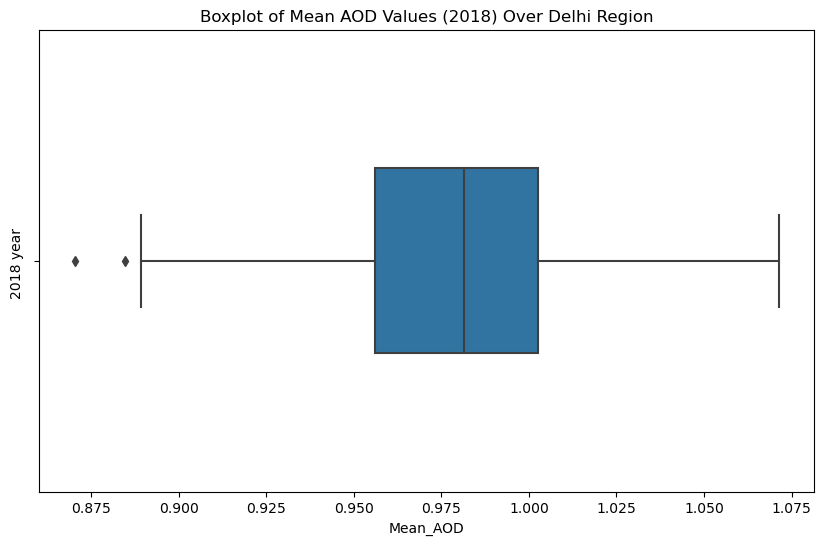

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df_2023_with_means' containing the mean AOD values

# Create a boxplot for the AOD values
plt.figure(figsize=(10, 6))
sns.boxplot(x='Mean_AOD', data=df_2018_with_means, orient='v', width=0.4)
plt.title('Boxplot of Mean AOD Values (2018) Over Delhi Region')
plt.ylabel('2018 year ')
plt.savefig("/home/sysadm/Documents/Boxplot of Mean AOD Values (2018) Over Delhi Region.png")
plt.show()


/home/sysadm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


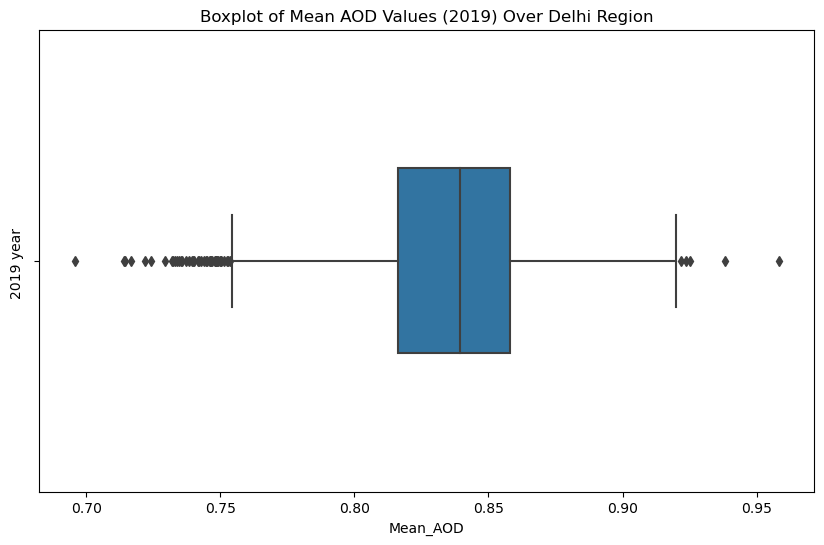

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df_2023_with_means' containing the mean AOD values

# Create a boxplot for the AOD values
plt.figure(figsize=(10, 6))
sns.boxplot(x='Mean_AOD', data=df_2019_with_means, orient='v', width=0.4)
plt.title('Boxplot of Mean AOD Values (2019) Over Delhi Region')
plt.ylabel('2019 year ')
plt.savefig("/home/sysadm/Documents/Boxplot of Mean AOD Values (2019) Over Delhi Region.png")
plt.show()


/home/sysadm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


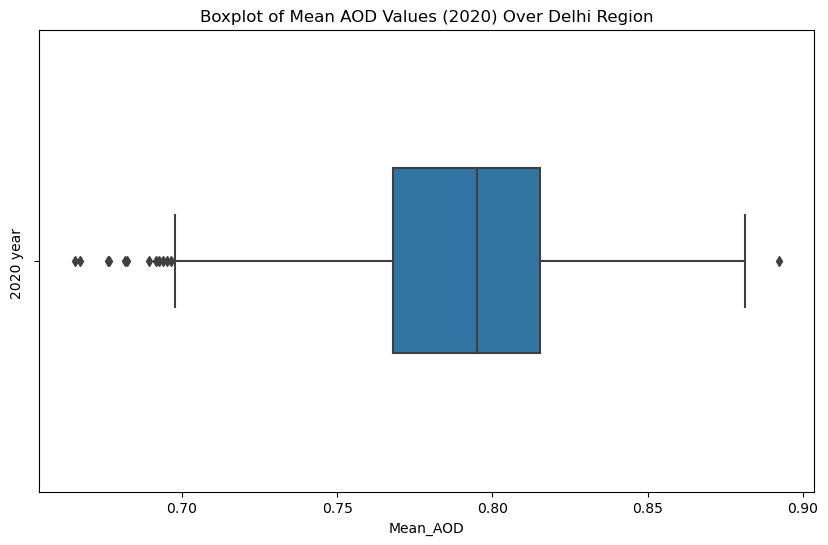

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df_2023_with_means' containing the mean AOD values

# Create a boxplot for the AOD values
plt.figure(figsize=(10, 6))
sns.boxplot(x='Mean_AOD', data=df_2020_with_means, orient='v', width=0.4)
plt.title('Boxplot of Mean AOD Values (2020) Over Delhi Region')
plt.ylabel('2020 year ')
plt.savefig("/home/sysadm/Documents/Boxplot of Mean AOD Values (2020) Over Delhi Region.png")
plt.show()


/home/sysadm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


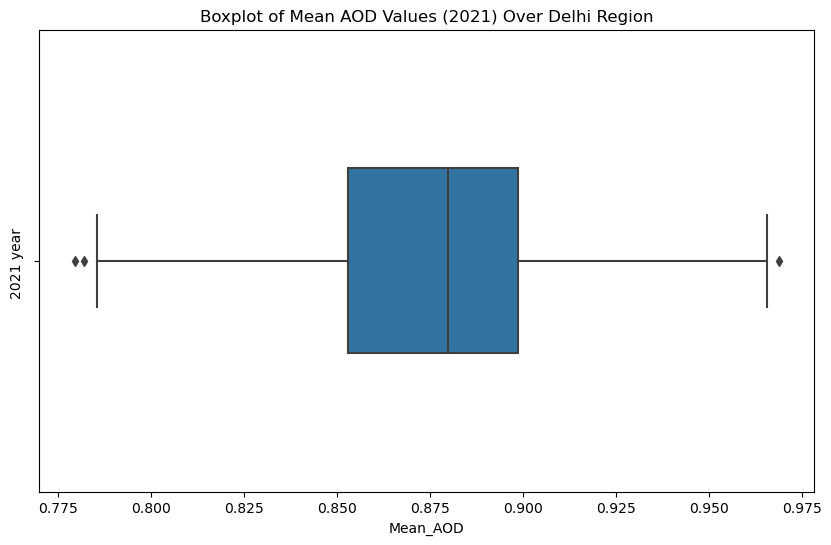

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df_2023_with_means' containing the mean AOD values

# Create a boxplot for the AOD values
plt.figure(figsize=(10, 6))
sns.boxplot(x='Mean_AOD', data=df_2021_with_means, orient='v', width=0.4)
plt.title('Boxplot of Mean AOD Values (2021) Over Delhi Region')
plt.ylabel('2021 year ')
plt.savefig("/home/sysadm/Documents/Boxplot of Mean AOD Values (2021) Over Delhi Region.png")
plt.show()


/home/sysadm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


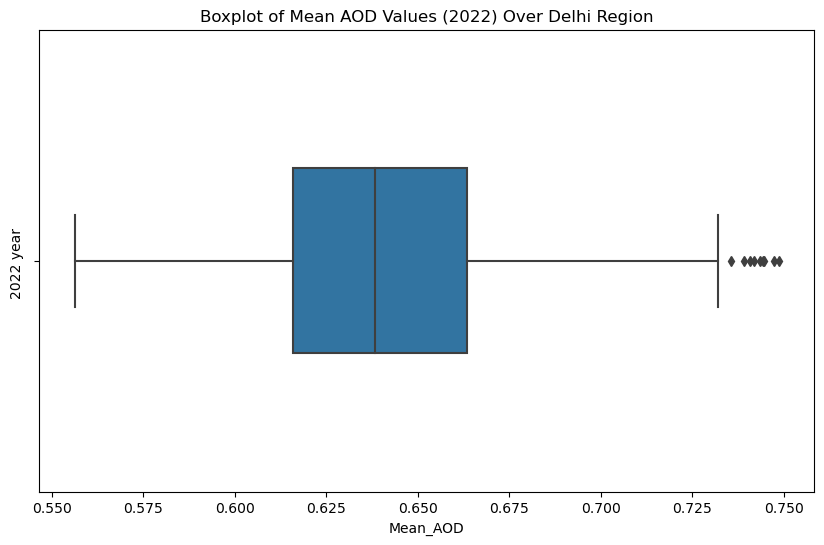

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df_2023_with_means' containing the mean AOD values

# Create a boxplot for the AOD values
plt.figure(figsize=(10, 6))
sns.boxplot(x='Mean_AOD', data=df_2022_with_means, orient='v', width=0.4)
plt.title('Boxplot of Mean AOD Values (2022) Over Delhi Region')
plt.ylabel('2022 year ')
plt.savefig("/home/sysadm/Documents/Boxplot of Mean AOD Values (2022) Over Delhi Region.png")
plt.show()


/home/sysadm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


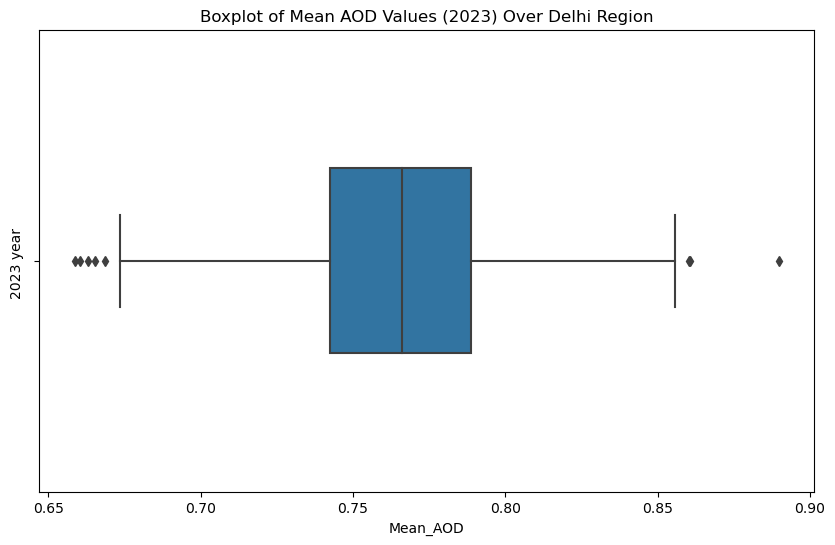

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df_2023_with_means' containing the mean AOD values

# Create a boxplot for the AOD values
plt.figure(figsize=(10, 6))
sns.boxplot(x='Mean_AOD', data=df_2023_with_means, orient='v', width=0.4)
plt.title('Boxplot of Mean AOD Values (2023) Over Delhi Region')
plt.ylabel('2023 year ')
plt.savefig("/home/sysadm/Documents/Boxplot of Mean AOD Values (2023) Over Delhi Region.png")
plt.show()
